# MUHAMAD YUNUS

# Import Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
# from google.colab import drive
from datetime import datetime
import math
import matplotlib.mlab as mlab
import matplotlib.cm as cm


# Load Dataset

In [2]:
# drive.mount('/content/gdrive')

In [3]:
df = pd.read_csv('D:\A DIGITAL SKOLA\Project\Dataset_Retail.csv', encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Exploratory Data

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# unique value dataset by columns
unique = df.apply(lambda x: x.unique().shape[0])
unique

InvoiceNo      25900
StockCode       4070
Description     4224
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4373
Country           38
dtype: int64

In [7]:
# Pembelian Produk Terbanyak
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [8]:
# Produk Paling Mahal
df.sort_values("UnitPrice", ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:57,16453.71,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom


In [9]:
# Total Spending
df['TotalSpending'] = df['UnitPrice']*df['Quantity']

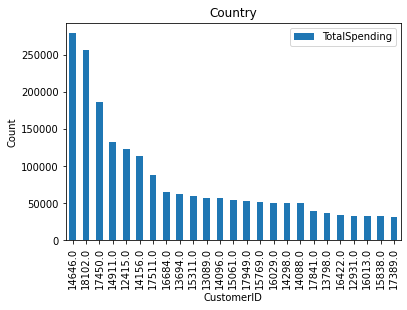

In [10]:
y = df.groupby('CustomerID').agg({'TotalSpending':'sum'}).sort_values('TotalSpending', ascending=False).head(25)
y.plot(kind='bar')
plt.title('Country')
plt.ylabel('Count')
plt.show()

In [11]:
df.sort_values('TotalSpending', ascending=False).head()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [12]:
#invoice with in many total spanding
df.groupby('InvoiceNo').agg({'TotalSpending':'sum'}).sort_values('TotalSpending', ascending=False).head()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [13]:
#  Negara dengan aggregat Pembelian Terbanyak
df.groupby('Country').agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False).head()

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


<AxesSubplot:xlabel='Country'>

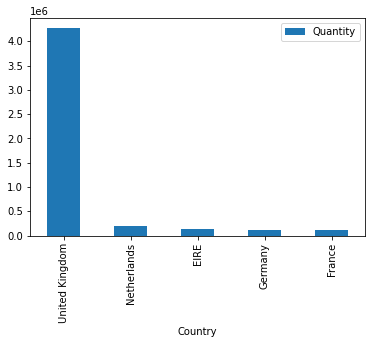

In [14]:
x = df.groupby('Country').agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False).head()
x.plot(kind='bar')

# DATA QUALITY CHECKING

In [15]:
# Checking data row, col
df.shape

(541909, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      541909 non-null  object 
 1   StockCode      541909 non-null  object 
 2   Description    540455 non-null  object 
 3   Quantity       541909 non-null  int64  
 4   InvoiceDate    541909 non-null  object 
 5   UnitPrice      541909 non-null  float64
 6   CustomerID     406829 non-null  float64
 7   Country        541909 non-null  object 
 8   TotalSpending  541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [17]:
# Data Describe
df.describe()

,Quantity,UnitPrice,CustomerID,TotalSpending
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [18]:
# Cek Missing Value
print(df.isnull().sum())

InvoiceNo             0
StockCode             0
Description        1454
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID       135080
Country               0
TotalSpending         0
dtype: int64


In [19]:
# Checking Data Duplicated
df.duplicated().sum()

5268

In [20]:
duplicate = df[df.duplicated()]
duplicate[['CustomerID']]

,CustomerID
517,17908.0
527,17908.0
537,17908.0
539,17908.0
555,17920.0
...,...
541675,14446.0
541689,14446.0
541692,14446.0
541699,14446.0


#  Data Preparation

In [21]:
# Drop Data Duplicated
df = df.drop_duplicates()

In [22]:
# Handling Missing Value Remove
df.dropna(inplace=True, subset=['CustomerID', 'Description']) 

In [23]:
# Check UnitPrice and Quantity negative values
display(df[(df.UnitPrice<0)])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending


In [24]:
display(df[(df.Quantity<0)])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [25]:
# Remove Negative Value
df = df[~(df.Quantity<0)]
df =df[df.UnitPrice>0]

In [26]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85


C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(1.0, 0.4, 'Batas Bawah')

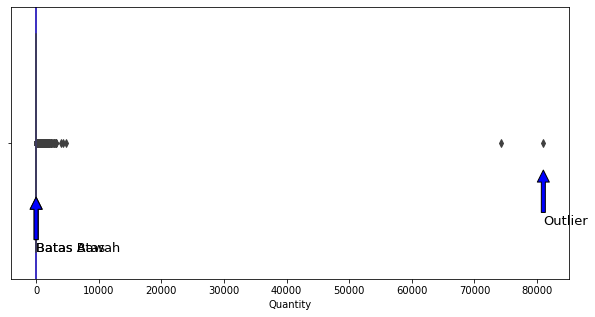

In [27]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Quantity'])
plt.axvline(df['Quantity'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(df['Quantity'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(df['Quantity'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (df['Quantity'].describe()['max'],0.1), xytext = (df['Quantity'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Quantity'].describe()['75%'] - df['Quantity'].describe()['25%']
plt.annotate('Batas Atas', (df['Quantity'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (df['Quantity'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.annotate('Batas Bawah', (df['Quantity'].describe()['min'], 0.2), 
             xytext = (df['Quantity'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


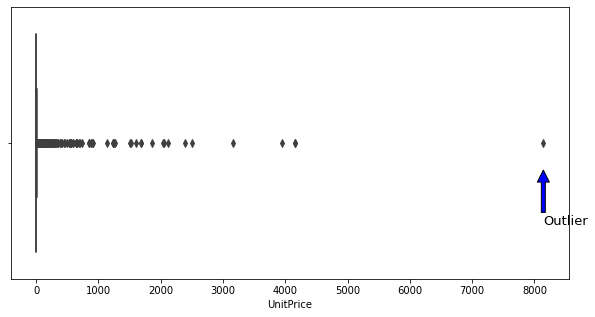

In [28]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['UnitPrice'])
plt.annotate('Outlier', (df['UnitPrice'].describe()['max'],0.1), xytext = (df['UnitPrice'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['UnitPrice'].describe()['75%'] - df['UnitPrice'].describe()['25%']

In [29]:
df['Quantity'].describe()

count    392692.000000
mean         13.119702
std         180.492832
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [30]:
# def detect_outliers(df, x):
#  Q1 = df[x].describe()['25%']
#  Q3 = df[x].describe()['75%']
#  IQR = Q3-Q1
#  lower_lim = Q1-1.5*IQR
#  upper_lim = Q3+1.5*IQR
#  return df[(df['Quantity'] < lower_lim) | (df['Quantity'] > upper_lim)]

In [31]:
Q1 = df['Quantity'].describe()['25%']
Q3 = df['Quantity'].describe()['75%']
IQR = Q3-Q1
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
df = df[(df['Quantity'] < lower_lim) | (df['Quantity'] > upper_lim).sum()]

In [32]:
# df = df.drop((df[df['Quantity']<lower_lim]).index, axis=0)
df = df.drop((df[df['Quantity'] > upper_lim]).index, axis=0)

In [33]:
Q1 = df['UnitPrice'].describe()['25%']
Q3 = df['UnitPrice'].describe()['75%']
IQR = Q3-Q1
lower_lim = Q1-1.5*IQR
upper_lim = Q3+1.5*IQR
df = df[(df['UnitPrice'] < lower_lim) | (df['UnitPrice'] > upper_lim).sum()]

In [34]:
# df = df.drop((df[df['UnitPrice']<upper_lim]).index, axis=0)
df = df.drop((df[df['UnitPrice']> upper_lim]).index, axis=0)

C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


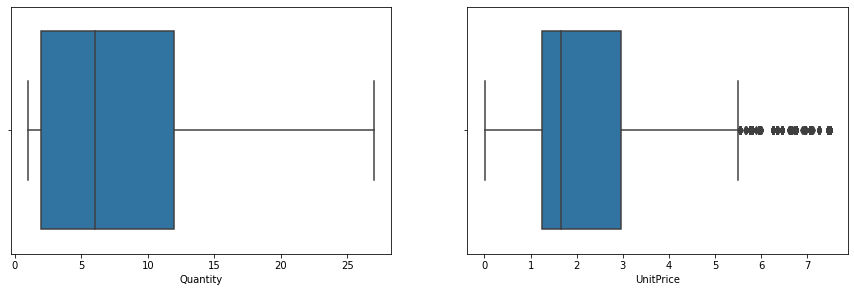

In [35]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,2,2)
sns.boxplot(df['UnitPrice'])
plt.show()

In [36]:
#convert Invoice Date to type Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [37]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [38]:
# Create date variable that records recency
import datetime
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data by each customer
customers= df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSpending': 'sum'})

# Rename columns
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSpending': 'MonetaryValue'}, inplace=True)

C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

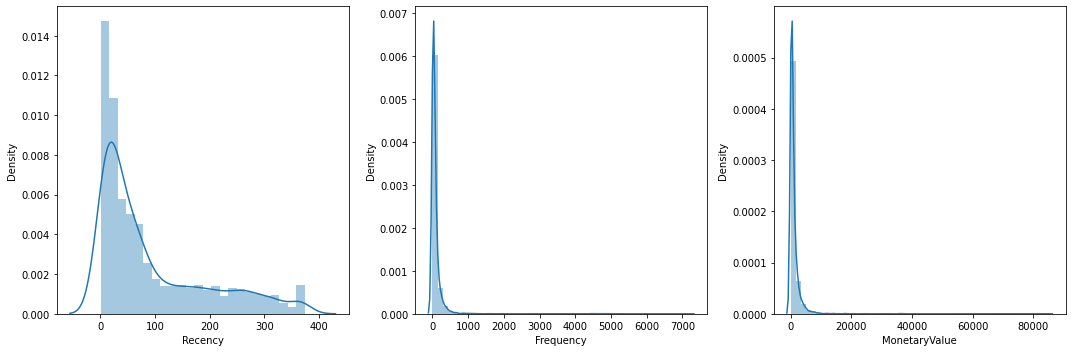

In [39]:
# Skewness
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

# RFM SCORE

In [40]:
#RFM score values 
customers['RecencyScore'] = pd.qcut(customers['Recency'],5,labels=[5,4,3,2,1])
customers['FrequencyScore'] = pd.qcut(customers['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
customers['MonetaryScore'] = pd.qcut(customers['MonetaryValue'],5,labels=[1,2,3,4,5])

In [41]:
#RFM score values are combined side by side in str format
(customers['RecencyScore'].astype(str) + 
 customers['FrequencyScore'].astype(str) + 
 customers['MonetaryScore'].astype(str)).head()

CustomerID
12347.0    555
12348.0    111
12349.0    444
12350.0    122
12352.0    344
dtype: object

In [42]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
print(seg_map)

{'[1-2][1-2]': 'Hibernating', '[1-2][3-4]': 'At Risk', '[1-2]5': "Can't Lose", '3[1-2]': 'About to Sleep', '33': 'Need Attention', '[3-4][4-5]': 'Loyal Customers', '41': 'Promising', '51': 'New Customers', '[4-5][2-3]': 'Potential Loyalists', '5[4-5]': 'Champions'}


In [43]:
#creation of segment variable
customers['Segment'] = customers['RecencyScore'].astype(str) + customers['FrequencyScore'].astype(str)
customers['Segment'] = customers['Segment'].replace(seg_map, regex=True)

In [44]:
#Table RFM score
customers["RFM_SCORE"] = customers['RecencyScore'].astype(str) + customers['FrequencyScore'].astype(str) + customers['MonetaryScore'].astype(str)
customers.head() 

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Segment,RFM_SCORE
CustomerID,,,,,,,,
12347.0,2,166,3314.73,5,5,5,Champions,555
12348.0,249,6,90.20,1,1,1,Hibernating,111
12349.0,19,58,999.15,4,4,4,Loyal Customers,444
12350.0,310,16,294.40,1,2,2,Hibernating,122
12352.0,36,66,1130.94,3,4,4,Loyal Customers,344


In [45]:
customers[["Segment", "Recency","Frequency","MonetaryValue"]].groupby("Segment").agg(["mean","count"])

Recency         Frequency       MonetaryValue      
                           mean count        mean count          mean count
Segment                                                                    
About to Sleep        52.757188   313   13.153355   313    251.119681   313
At Risk              168.512367   566   49.053004   566    646.321219   566
Can't Lose           144.059524    84  157.809524    84   1586.486440    84
Champions              6.113367   591  245.708968   591   3028.451083   591
Hibernating          210.188305  1009   11.615461  1009    205.744363  1009
Loyal Customers       34.179975   789  137.690748   789   1708.362902   789
Need Attention        52.072165   194   36.211340   194    545.917010   194
New Customers          6.704918    61    6.639344    61    159.535902    61
Potential Loyalists   16.827869   488   29.694672   488    505.385576   488
Promising             23.572917    96    6.291667    96    148.086667    96

In [78]:
# Set the Numbers
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
4186,9.573349,2.163738,5.155137
4187,8.468726,1.659632,3.606777
4188,2.507167,2.163738,4.836441
4189,1.568499,7.468612,12.604731
4190,5.317786,4.217503,9.867451


In [80]:
import plotly.express as px
plt.figure(figsize=(20,20))

fig = px.scatter_3d(customers_fix x='Recency', y='Frequency', z='MonetaryValue')
fig.show()

SyntaxError: invalid syntax (Temp/ipykernel_6428/2360181032.py, line 4)

# Scalling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0. -0. -0.]
[1. 1. 1.]


In [48]:
from sklearn.cluster import KMeans

# Elbow Method

In [49]:
inertia_list = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(customers_fix)
    inertia_list.append(kmeans_model.inertia_)
    print("For n_clusters = {}, inertia value is {})".format(num_clusters, kmeans_model.inertia_))

For n_clusters = 1, inertia value is 95354.56843816662)
For n_clusters = 2, inertia value is 48119.31586396628)
For n_clusters = 3, inertia value is 34278.39996153561)
For n_clusters = 4, inertia value is 27176.978661267996)
For n_clusters = 5, inertia value is 22509.138167687925)
For n_clusters = 6, inertia value is 19283.54887684421)
For n_clusters = 7, inertia value is 17150.874265343493)
For n_clusters = 8, inertia value is 15455.392441307009)
For n_clusters = 9, inertia value is 13905.224520385376)
For n_clusters = 10, inertia value is 12741.964226140699)


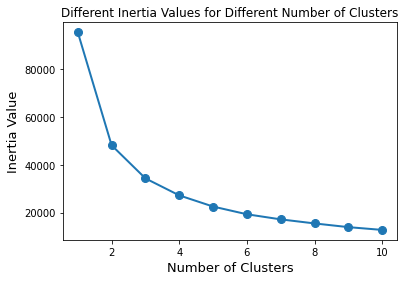

In [50]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [51]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

3
3


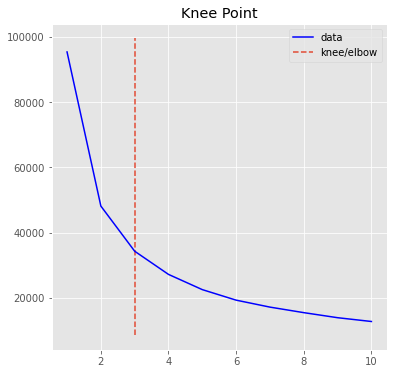

In [52]:
plt.style.use('ggplot')
kneedle.plot_knee()

# Silhouette Method

In [53]:
from sklearn.metrics import silhouette_samples, silhouette_score

sh_list = []
for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(customers_fix)
   
    score = silhouette_score(customers_fix, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.4379521926817548)
For n_clusters = 3, silhouette score is 0.3529942727546929)
For n_clusters = 4, silhouette score is 0.3372808315352427)
For n_clusters = 5, silhouette score is 0.33306862202306875)
For n_clusters = 6, silhouette score is 0.33197808471854)
For n_clusters = 7, silhouette score is 0.31871232668207955)
For n_clusters = 8, silhouette score is 0.2990386271150422)
For n_clusters = 9, silhouette score is 0.3065391116655298)
For n_clusters = 10, silhouette score is 0.2981640808923918)


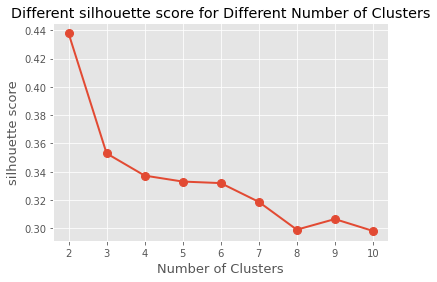

In [54]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()
# di stage ini kita menemukan k=3 dengan score tertinggi

# K-Mean

In [55]:
k_means = KMeans(n_clusters = 3, random_state = 42)
k_means.fit(customers_fix)
labels = k_means.labels_
customers['cluster_labels'] = labels
customers.tail()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Segment,RFM_SCORE,cluster_labels
CustomerID,,,,,,,,,
18280.0,278,8,137.00,1,1,1,Hibernating,111,0
18281.0,181,5,46.92,1,1,1,Hibernating,111,0
18282.0,8,8,113.13,5,1,1,New Customers,511,2
18283.0,4,717,2002.63,5,5,5,Champions,555,1
18287.0,43,50,960.76,3,3,4,Need Attention,334,2


In [56]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(4191,)

In [66]:
import plotly.express as px

x_val = 'Recency'
y_val = 'Frequency'
z_val = 'MonetaryValue'

fig = px.scatter_3d(customers_fix, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

# Clustering

In [58]:
customers["Cluster"] = model.labels_
customers.tail()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Segment,RFM_SCORE,cluster_labels,Cluster
CustomerID,,,,,,,,,,
18280.0,278,8,137.00,1,1,1,Hibernating,111,0,1
18281.0,181,5,46.92,1,1,1,Hibernating,111,0,1
18282.0,8,8,113.13,5,1,1,New Customers,511,2,2
18283.0,4,717,2002.63,5,5,5,Champions,555,1,0
18287.0,43,50,960.76,3,3,4,Need Attention,334,2,2


In [59]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          21.9     243.6        3182.4   888
1         187.7      15.8         221.6  1509
2          47.4      51.9         634.9  1794

# LINE PLOT

In [60]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-1.851552,1.210573,1.749740,12347.0,0
1,1.355865,-1.315656,-1.097579,12348.0,1
2,-0.683107,0.375779,0.407937,12349.0,2
3,1.575604,-0.602232,-0.505556,12350.0,1
4,-0.258715,0.476570,0.523061,12352.0,2


In [61]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,12347.0,0,Recency,-1.851552
1,12348.0,1,Recency,1.355865
2,12349.0,2,Recency,-0.683107
3,12350.0,1,Recency,1.575604
4,12352.0,2,Recency,-0.258715


C:\Users\nama\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

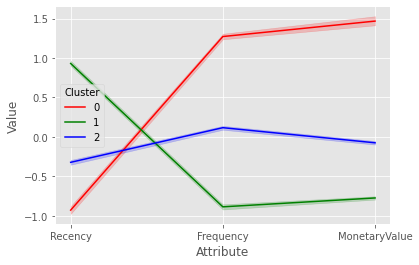

In [62]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt, palette=['r', 'g', 'b'])

In [ ]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          21.9     243.6        3182.4   888
1         187.7      15.8         221.6  1509
2          47.4      51.9         634.9  1794

In [63]:
cluster_avg = customers.groupby('Cluster').mean()
population_avg = customers.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

C:\Users\nama\AppData\Local\Temp/ipykernel_6428/3692274100.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population_avg = customers.mean()


,Cluster,Frequency,MonetaryValue,RFM_SCORE,Recency,cluster_labels
Cluster,,,,,,
0,NaN,2.063160,2.102079,NaN,-0.763703,0.097227
1,NaN,-0.801864,-0.783957,NaN,1.029515,-0.968099
2,NaN,-0.346752,-0.381079,NaN,-0.487943,0.766178


# *K-medoid*

In [64]:
from sklearn_extra.cluster import KMedoids

inertia_list = []
for num_clusters in range(1, 11):
    kmedoids_model = KMedoids(n_clusters=num_clusters)
    kmedoids_model.fit(customers_fix)
    inertia_list.append(kmedoids_model.inertia_)
    print(f"The inertia of {num_clusters} clusters : {kmedoids_model.inertia_}")


The inertia of 1 clusters : 17178.014899102454
The inertia of 2 clusters : 12433.687859445357
The inertia of 3 clusters : 10379.62238355165
The inertia of 4 clusters : 9348.412843346465
The inertia of 5 clusters : 8474.290874735641
The inertia of 6 clusters : 7958.768692173065
The inertia of 7 clusters : 7541.574794895563
The inertia of 8 clusters : 7243.203847448421
The inertia of 9 clusters : 6829.112878500147
The inertia of 10 clusters : 6561.197497410567


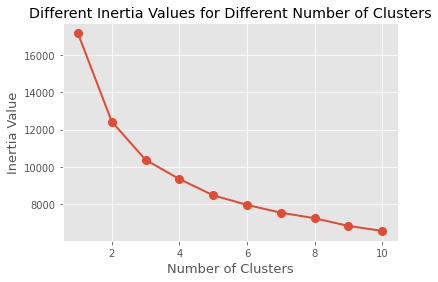

In [67]:
plt.plot(range(1,11),inertia_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters")
plt.show()

In [68]:
from kneed import KneeLocator, DataGenerator
kneedle = KneeLocator(range(1,11),inertia_list, S=1.0, curve='convex', direction='decreasing')
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

3
3


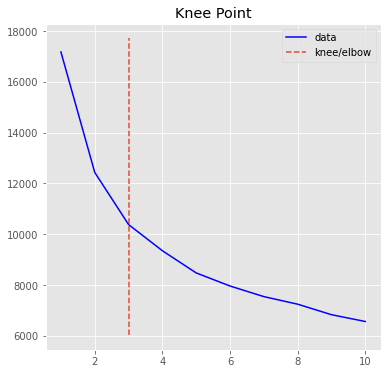

In [69]:
kneedle.plot_knee()

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
sh_list = []
for num_clusters in range(2, 11):
    kmedoids = KMedoids(n_clusters=num_clusters)
    cluster_labels = kmedoids.fit_predict(customers_fix)
   
    score = silhouette_score(customers_fix, cluster_labels)
    sh_list.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(num_clusters, score))

For n_clusters = 2, silhouette score is 0.424045415550569)
For n_clusters = 3, silhouette score is 0.3440946698756048)
For n_clusters = 4, silhouette score is 0.3232811851085254)
For n_clusters = 5, silhouette score is 0.324760244010234)
For n_clusters = 6, silhouette score is 0.293616723868054)
For n_clusters = 7, silhouette score is 0.29324230415482466)
For n_clusters = 8, silhouette score is 0.2779180129137423)
For n_clusters = 9, silhouette score is 0.27778509472229385)
For n_clusters = 10, silhouette score is 0.2664132271829375)


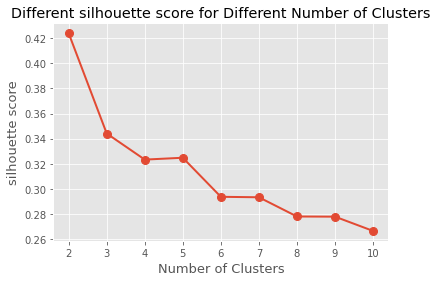

In [71]:
plt.plot(range(2,11),sh_list, marker='o', linewidth=2, markersize=8)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("silhouette score", size=13)
plt.title("Different silhouette score for Different Number of Clusters")
plt.show()

In [72]:
#Kmedoids
k_medoids = KMedoids(n_clusters = 3, random_state = 42)
k_medoids.fit(customers_fix)
labels = k_medoids.labels_
customers_fix['cluster_labels'] = labels
customers_fix.tail()

,Recency,Frequency,MonetaryValue,cluster_labels
4186,9.573349,2.163738,5.155137,2
4187,8.468726,1.659632,3.606777,2
4188,2.507167,2.163738,4.836441,0
4189,1.568499,7.468612,12.604731,1
4190,5.317786,4.217503,9.867451,0


In [73]:
customers["cluster_labels"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,Segment,RFM_SCORE,cluster_labels,Cluster
CustomerID,,,,,,,,,,
12347.0,2,166,3314.73,5,5,5,Champions,555,0,0
12348.0,249,6,90.20,1,1,1,Hibernating,111,1,1
12349.0,19,58,999.15,4,4,4,Loyal Customers,444,2,2
12350.0,310,16,294.40,1,2,2,Hibernating,122,1,1
12352.0,36,66,1130.94,3,4,4,Loyal Customers,344,2,2


In [74]:
import plotly.express as px
plt.figure(figsize=(20,20))
x_val = 'Recency'
y_val = 'Frequency'
z_val = 'MonetaryValue'

fig = px.scatter_3d(customers_fix, x=x_val, y=y_val, z=z_val, color='cluster_labels', labels='cluster_labels')
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [75]:
df_out = customers_fix.groupby(by = 'cluster_labels').sum()[['Recency', 'Frequency','MonetaryValue']].reset_index()
df_out

,cluster_labels,Recency,Frequency,MonetaryValue
0,0,7478.192827,5633.037270,11497.457265
1,1,4692.793484,6799.430657,16287.589268
2,2,11590.372987,3605.443395,7853.142313


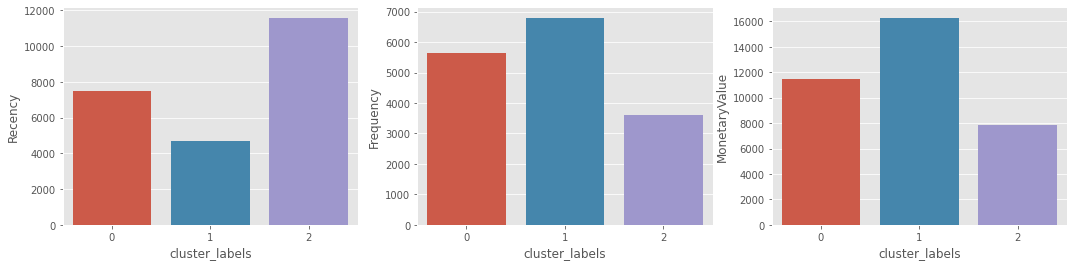

In [76]:
plt.figure(figsize = (18,4))
plt.subplot(1,3,1)
sns.barplot(x= 'cluster_labels',y = 'Recency', data = df_out)
plt.subplot(1,3,2)
sns.barplot(x= 'cluster_labels',y = 'Frequency', data = df_out)
plt.subplot(1,3,3)
sns.barplot(x= 'cluster_labels',y = 'MonetaryValue', data = df_out)
plt.show()

<AxesSubplot:xlabel='MonetaryValue'>

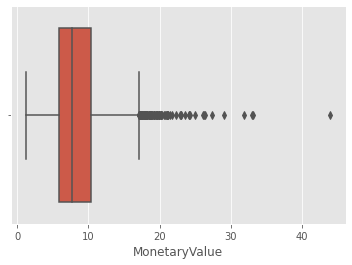

In [ ]:
import seaborn as sns
sns.boxplot(data=customers_fix, x='MonetaryValue')